In [1]:
import bw2data, bw2io
import bw2calc
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import pandas as pd
import xarray as xr
plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.style.use('tableau-colorblind10') #seaborn-v0_8-whitegrid  tableau-colorblind10

### prepare dGWP  under SSPx, MY2020/2030/2040/2050

In [2]:
len_cf = 101  # add 1 as CFs value starting from year_0
MYs = [2020, 2030, 2040, 2050] #, 2060, 2070]
ssps = ["119", "245", "585"]   # in raw dataarray, there is another SSP prepared "126"
sp_col, my_col = [], []

for sp in ssps: 
    repeat_sp = [sp] * len_cf * len(MYs)
    sp_col.append(repeat_sp)
sp_col_f = my_col_f = [item for sublist in sp_col for item in sublist]

for my in MYs: 
    repeat_my = [my] * len_cf  
    my_col.append(repeat_my)

my_col = my_col * len(ssps)
my_col_f = [item for sublist in my_col for item in sublist]

print(len(sp_col_f), len(my_col_f))

1212 1212


In [3]:
year_col =  [np.arange(len_cf)] *len(ssps) * len(MYs)
year_col_f =  [item for sublist in year_col for item in sublist]
print(len(year_col_f))

1212


In [4]:
ghggass = ["CO2", "CH4", "N2O"]
#len_cf = 100   
#MYs = [2020, 2030, 2040, 2050] #, 2060, 2070]
#ssps = ["119", "126", "245", "585"]
cf_col_gas_allgas = []

for ghggas in ghggass: 
    cf_col_gas = []
    for sp in ssps:
        for MY in MYs:
            #print(f"read point CRF value for {ghggas} SSP {sp}, model year {MY}")
            filename = "agwp_dcf_gwp100_tstep1" + ghggas + "_ssp" + sp + "_fair_start2000MY" + str(MY) + ".xlsx"
            cf_file = os.path.join("/Users/susierwu/Dropbox/DLCA_DynCO2/pdpLCA_GT/FaIR_dpCFs/output/metrics/", filename)
            cf_gwp_df = pd.read_excel(cf_file, sheet_name = "agwp_pointvalue" + ghggas+ "_" + str(MY) ) 
            cf_gwp_pointvalue = cf_gwp_df[ghggas].values
            cf_col_gas.append(cf_gwp_pointvalue)
    cf_col_gas_allgas.append(cf_col_gas)

In [5]:
cf_col_gas_f = [item for sublist in cf_col_gas for item in sublist]
print(len(cf_col_gas_f))

1212


In [6]:
gas_all_f_list = []
# gas_irf_all_f_list[i] is the ith gas from ghggass, flattened array for all SSPs, MYt in order 
for i in range(len(cf_col_gas_allgas)): 
    gas_all_f = [item for sublist in cf_col_gas_allgas[i] for item in sublist]
    gas_all_f_list.append(gas_all_f)

In [7]:
cf_df = pd.DataFrame(zip(sp_col_f, my_col_f, year_col_f, gas_all_f_list[0], gas_all_f_list[1], gas_all_f_list[2]) , 
                     columns = ["SSP", "ModelYear", "Year", "CO2_CRF", "CH4_CRF", "N2O_CRF" ] ) 

In [8]:
cf_df.set_index(['SSP', 'ModelYear', 'Year'], inplace=True)

In [9]:
cf_df

CO2_CRF       CH4_CRF       N2O_CRF
SSP ModelYear Year                                          
119 2020      0     0.000000e+00  0.000000e+00  0.000000e+00
              1     1.972623e-15  2.119465e-13  3.113249e-13
              2     3.824369e-15  4.055518e-13  6.202773e-13
              3     5.577291e-15  5.822652e-13  9.271417e-13
              4     7.248949e-15  7.438037e-13  1.232007e-12
...                          ...           ...           ...
585 2050      96    7.829796e-14  2.057587e-12  1.842204e-11
              97    7.893536e-14  2.056536e-12  1.852855e-11
              98    7.957124e-14  2.055480e-12  1.863380e-11
              99    8.020562e-14  2.054463e-12  1.873779e-11
              100   8.083852e-14  2.053487e-12  1.884055e-11

[1212 rows x 3 columns]

In [10]:
#Deleting rows with YEAR_index value 0
cf_df_filtered = cf_df[~cf_df.index.get_level_values("Year").isin([0])]
cf_df_filtered

CO2_CRF       CH4_CRF       N2O_CRF
SSP ModelYear Year                                          
119 2020      1     1.972623e-15  2.119465e-13  3.113249e-13
              2     3.824369e-15  4.055518e-13  6.202773e-13
              3     5.577291e-15  5.822652e-13  9.271417e-13
              4     7.248949e-15  7.438037e-13  1.232007e-12
              5     8.853332e-15  8.914736e-13  1.534862e-12
...                          ...           ...           ...
585 2050      96    7.829796e-14  2.057587e-12  1.842204e-11
              97    7.893536e-14  2.056536e-12  1.852855e-11
              98    7.957124e-14  2.055480e-12  1.863380e-11
              99    8.020562e-14  2.054463e-12  1.873779e-11
              100   8.083852e-14  2.053487e-12  1.884055e-11

[1200 rows x 3 columns]

In [11]:
cf_xr = cf_df.to_xarray() 
cf_xr2 = cf_df_filtered.to_xarray() 

In [12]:
cf_xr.to_netcdf('data/CF_CRF0_100_perSSP_MY_majorghgs.nc')
cf_xr2.to_netcdf('data/CF_CRF1_100_perSSP_MY_majorghgs.nc')

### plot dCRF[1-100]

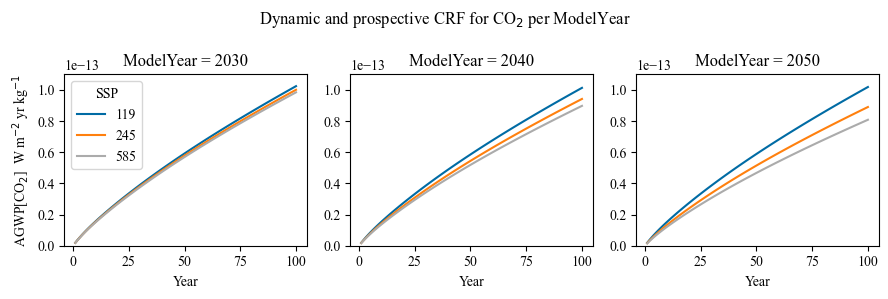

In [13]:
fig, axs = plt.subplots(1, 3 , figsize=(9, 3))

#cf_xr.sel(ModelYear = 2020)['CO2_IRF'].plot(x='Year', hue='SSP', ax=axs[0,0]) 
cf_xr2.sel(ModelYear = 2030)['CO2_CRF'].plot(x='Year', hue='SSP', ax=axs[0], add_legend = True)
cf_xr2.sel(ModelYear = 2040)['CO2_CRF'].plot(x='Year', hue='SSP', ax=axs[1], add_legend = False)
cf_xr2.sel(ModelYear = 2050)['CO2_CRF'].plot(x='Year', hue='SSP', ax=axs[2], add_legend = False)

axs[0].set_ylabel(r'AGWP[CO$_2$]  W m$^{-2}$ yr kg$^{-1}$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

for ax in axs:
    ax.set_ylim(0, 1.1e-13)
    ax.set_yticks( np.linspace(0, 1e-13, 6) )

fig.suptitle(r'Dynamic and prospective CRF for CO$_2$ per ModelYear', fontsize=12)
plt.tight_layout()
plt.savefig('output_plot/AGWP_CO2.jpg', dpi=300)

plt.show()

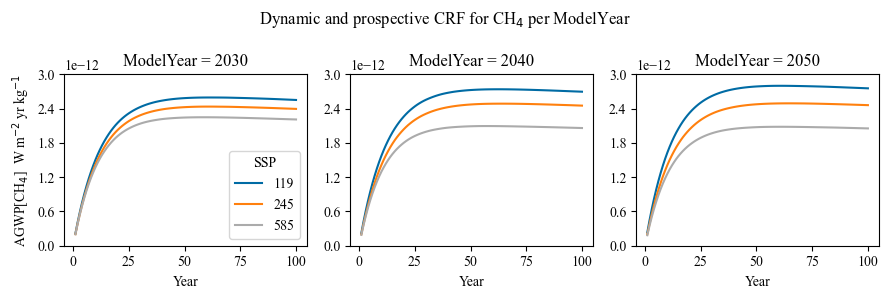

In [14]:
fig, axs = plt.subplots(1, 3 , figsize=(9, 3))

cf_xr2.sel(ModelYear = 2030)['CH4_CRF'].plot(x='Year', hue='SSP', ax=axs[0], add_legend = True)
cf_xr2.sel(ModelYear = 2040)['CH4_CRF'].plot(x='Year', hue='SSP', ax=axs[1], add_legend = False)
cf_xr2.sel(ModelYear = 2050)['CH4_CRF'].plot(x='Year', hue='SSP', ax=axs[2], add_legend = False)

axs[0].set_ylabel(r'AGWP[CH$_4$]  W m$^{-2}$ yr kg$^{-1}$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

for ax in axs:
    ax.set_ylim(0, 3e-12)
    ax.set_yticks( np.linspace(0, 3e-12, 6) )

fig.suptitle(r'Dynamic and prospective CRF for CH$_4$ per ModelYear', fontsize=12)
plt.tight_layout()
plt.savefig('output_plot/AGWP_CH4.jpg', dpi=300)
plt.show()

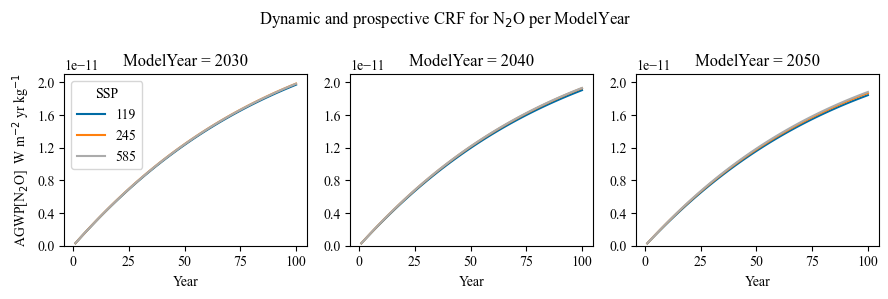

In [15]:
fig, axs = plt.subplots(1, 3 , figsize=(9, 3))

cf_xr2.sel(ModelYear = 2030)['N2O_CRF'].plot(x='Year', hue='SSP', ax=axs[0], add_legend = True)
cf_xr2.sel(ModelYear = 2040)['N2O_CRF'].plot(x='Year', hue='SSP', ax=axs[1], add_legend = False)
cf_xr2.sel(ModelYear = 2050)['N2O_CRF'].plot(x='Year', hue='SSP', ax=axs[2], add_legend = False)

axs[0].set_ylabel(r'AGWP[N$_2$O]  W m$^{-2}$ yr kg$^{-1}$')
axs[1].set_ylabel('')
axs[2].set_ylabel('')

for ax in axs:
    ax.set_ylim(0, 2.1e-11)
    ax.set_yticks( np.linspace(0, 2e-11, 6) )


fig.suptitle(r'Dynamic and prospective CRF for N$_2$O per ModelYear', fontsize=12)
plt.tight_layout()
plt.savefig('output_plot/AGWP_N2O.jpg', dpi=300)
plt.show()